In [1]:
import os
os.getcwd()
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import Series
from numpy import log

In [3]:
df= pd.read_csv('AirPassenger.csv')
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [4]:
df.dtypes

Year-Month    object
Pax            int64
dtype: object

In [5]:
df= pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  144 non-null    datetime64[ns]
 1   Pax         144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
# It is recommended that we make our time series references as the index
df= pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
# We can do slicing to use particular time range of data
df['1951-01-01':'1955-12-01']

,Pax
Year-Month,
1951-01-01,145
1951-02-01,150
1951-03-01,178
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184


<Axes: xlabel='Year-Month'>

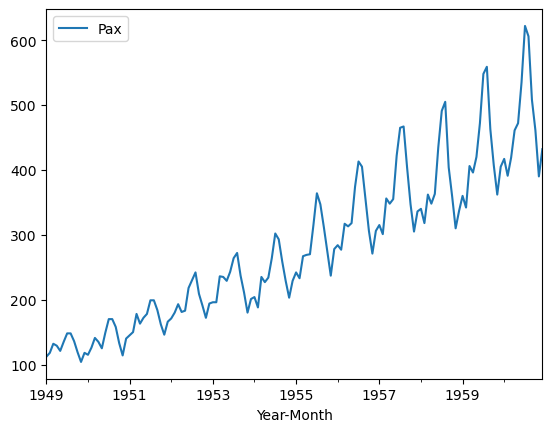

In [10]:
# Plot the data 
df.plot()

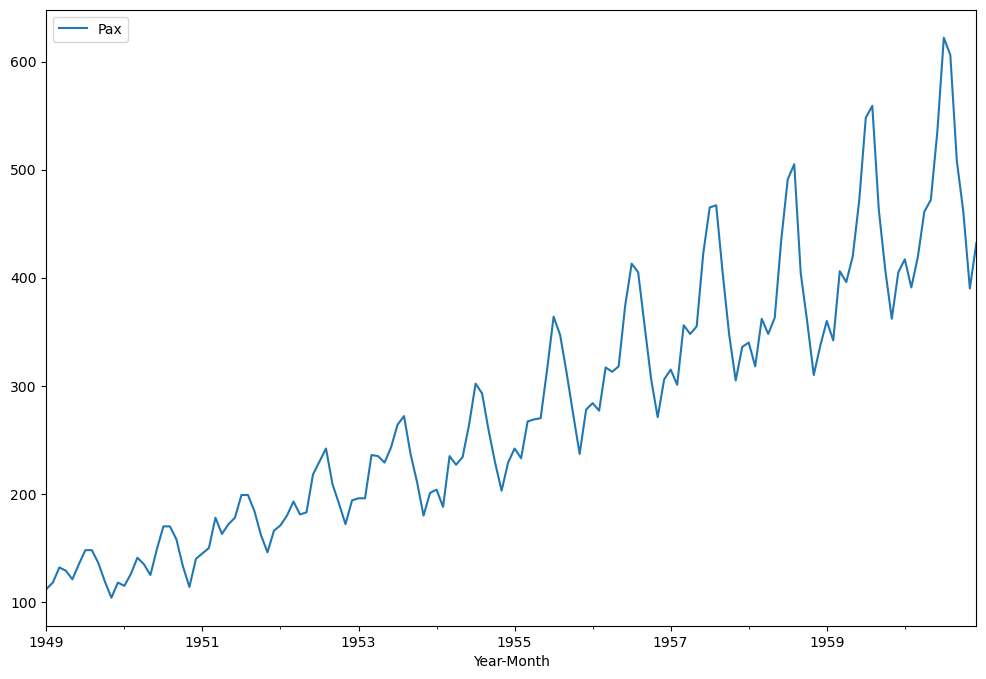

In [11]:
# increase the figure size
from pylab import rcParams
rcParams['figure.figsize']=12,8
df.plot()
plt.show()

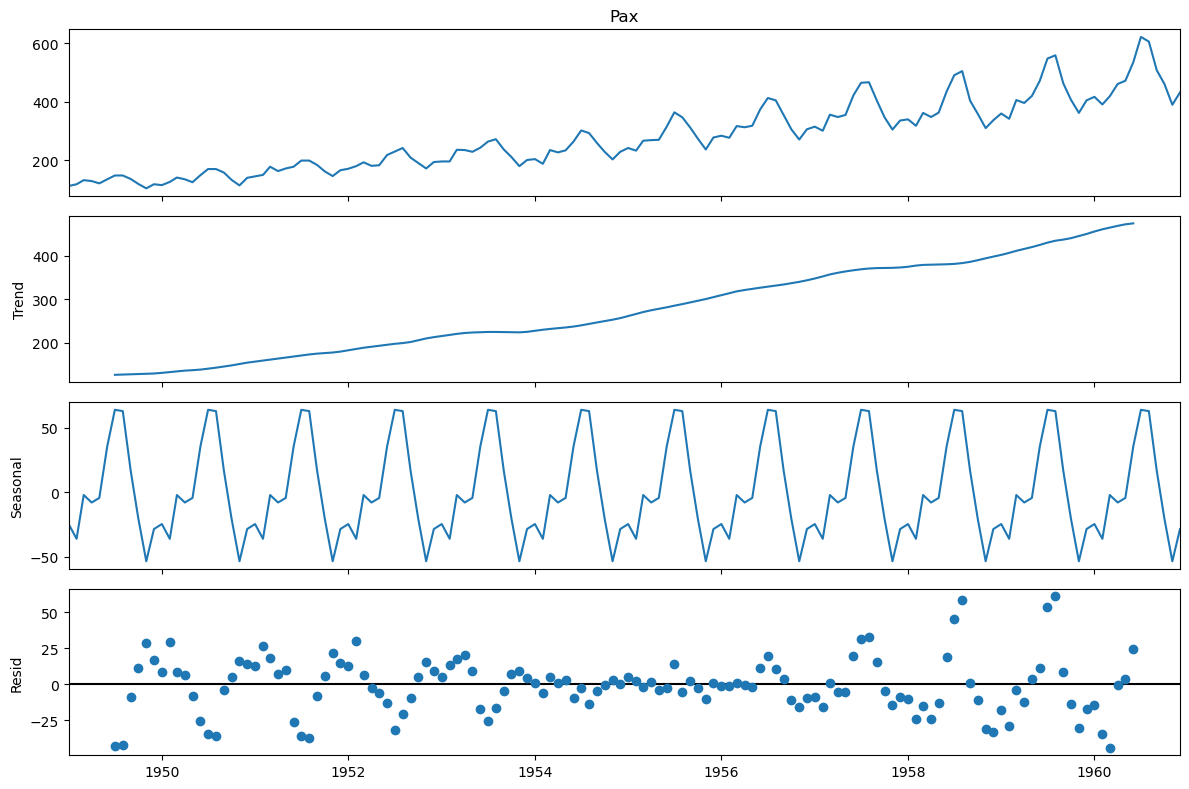

In [12]:
# Decompose to see the complete observation/component
# Decompose the time series additively

from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df['Pax'],model='additive',period=12)
decompose.plot()
plt.show()

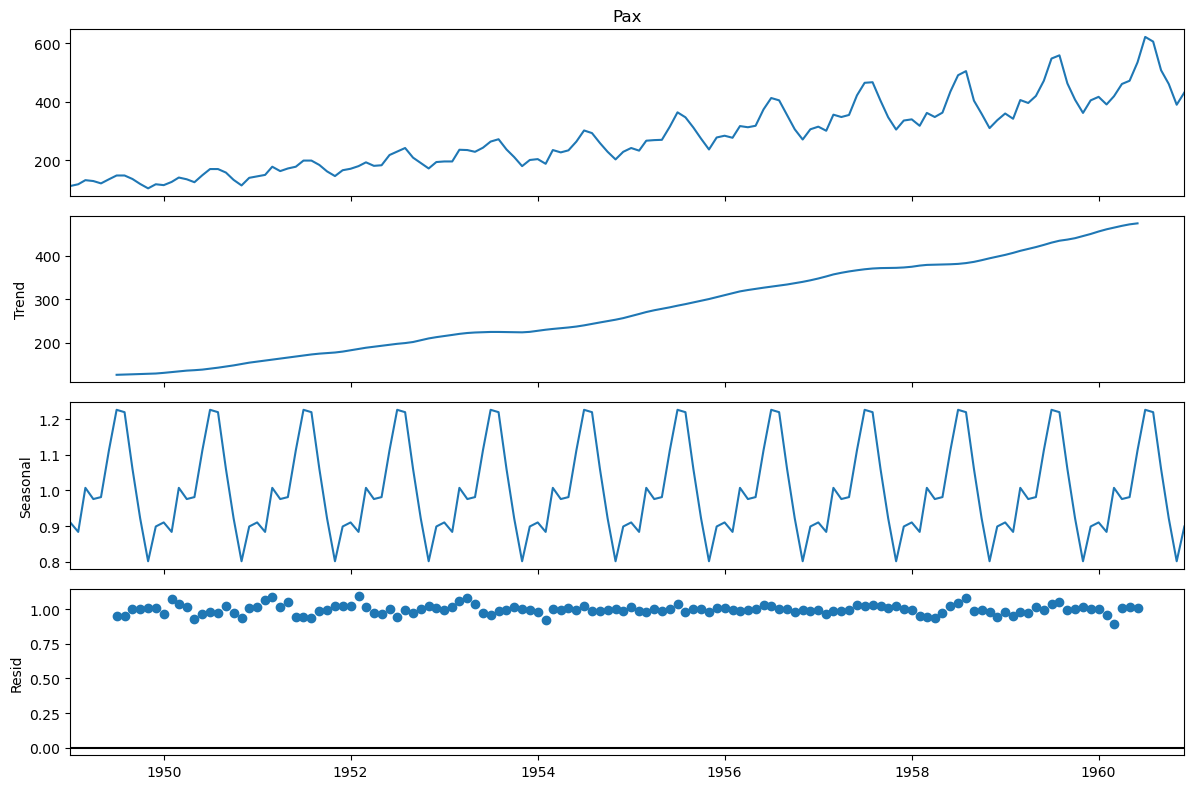

In [13]:
# Decompose the time series multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df['Pax'],model='multiplicative' ,period=12)
decompose.plot()
plt.show()

In [14]:
# Log transformation
df_log= df.copy()

In [15]:
df_log['Pax']=np.log(df)

In [16]:
df_log

,Pax
Year-Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


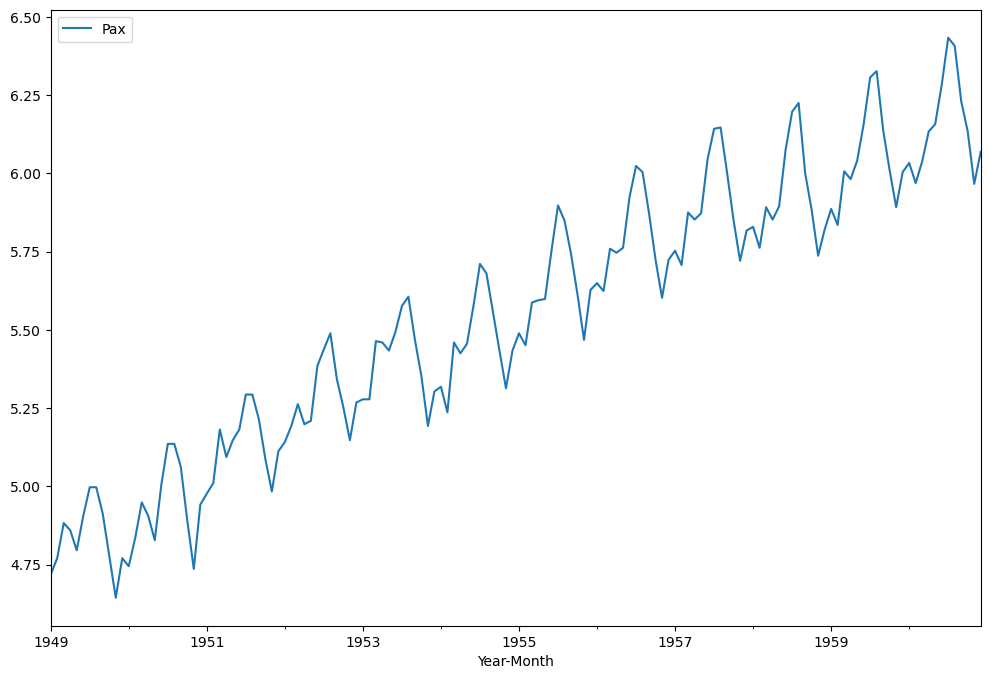

In [17]:
df_log.plot()
plt.show()

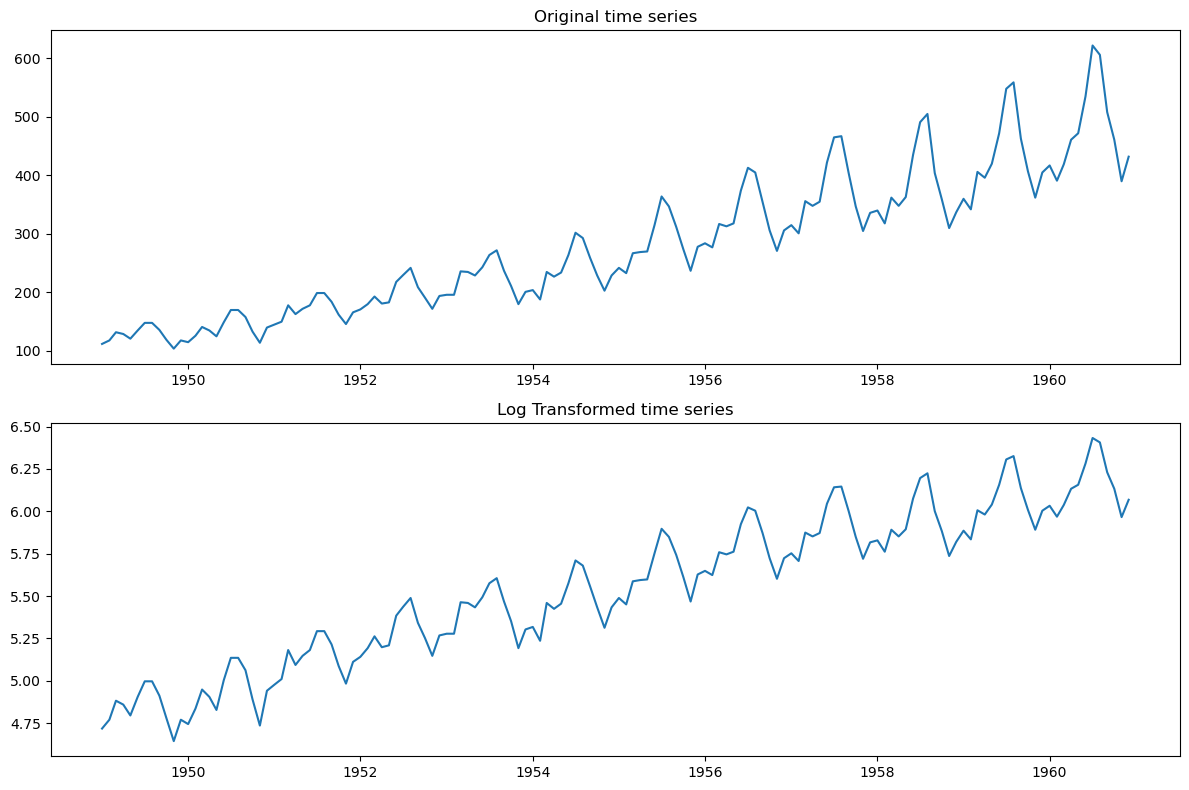

In [18]:
# Comparing the data

plt.subplot(2,1,1)
plt.title('Original time series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed time series')
plt.plot(df_log)

plt.tight_layout()

## Example 2

In [19]:
df1= pd.read_csv('daily-total-female-births.csv',parse_dates=['Date'],index_col=['Date'])
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [20]:
df1.isnull().sum()

Births    0
dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


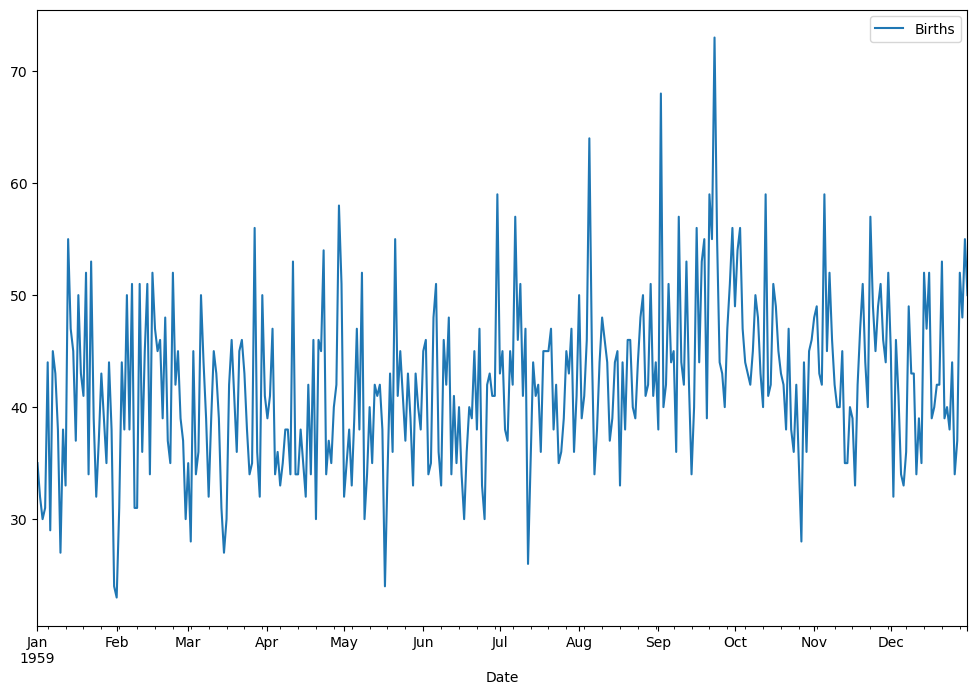

In [22]:
df1.plot()
plt.show()

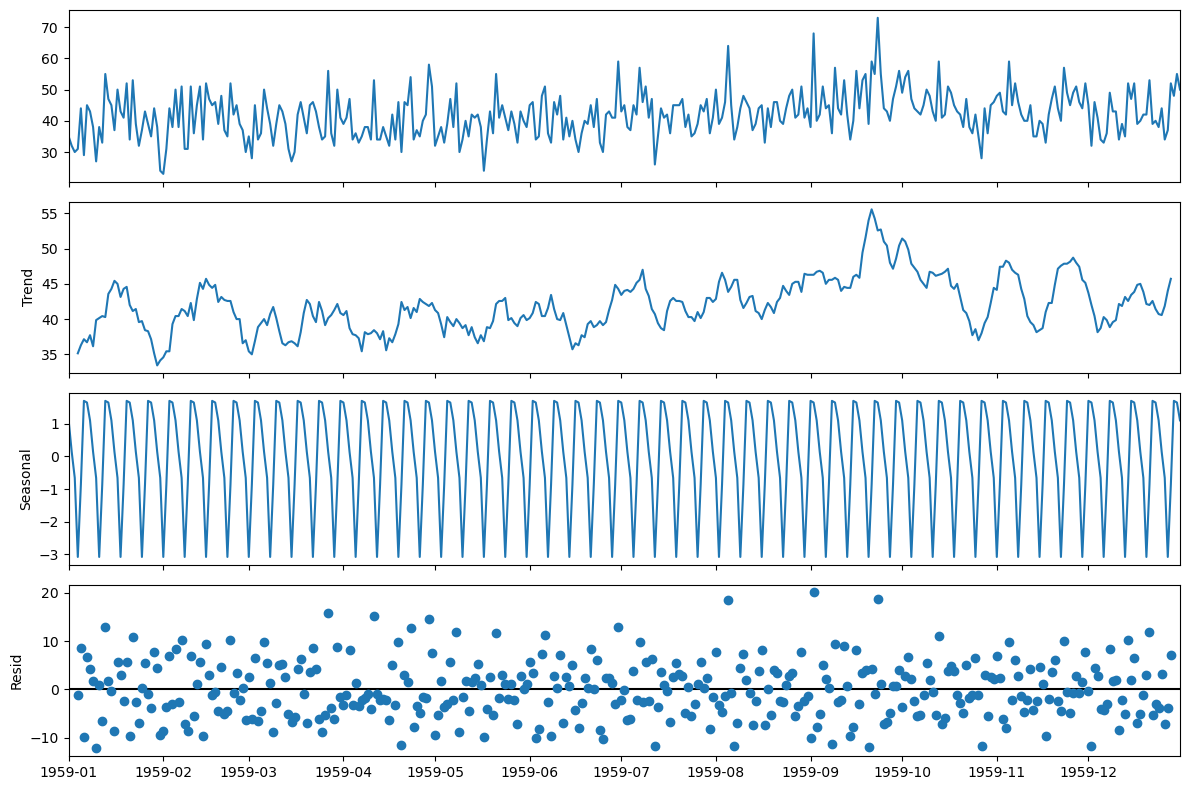

In [23]:
# Decomposition - Additive
df1_add_decopose= seasonal_decompose(df1,model='additive')
df1_add_decopose.plot()
plt.show()

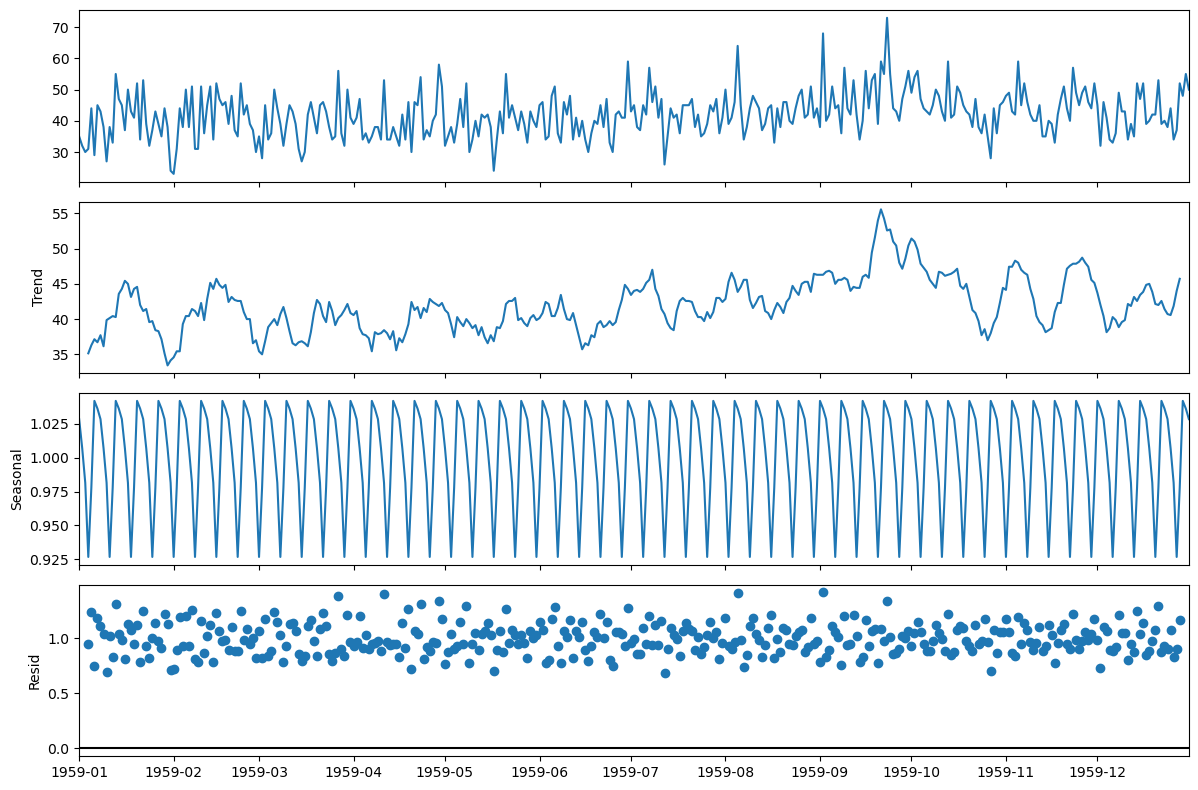

In [24]:
# Decomposition - multiplicative
df1_mul_decopose= seasonal_decompose(df1,model='multiplicative')
df1_mul_decopose.plot()
plt.show()

In [25]:
# Inspect each element
df1_add_decopose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [26]:
df1_add_decopose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [27]:
df1_add_decopose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [28]:
print(df1_mul_decopose.trend)
print(df1_mul_decopose.seasonal)
print(df1_mul_decopose.resid)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64
Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64
Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64


# Downsampling
- zoom out

In [29]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [39]:
# Changing monthly sales to quarterly .This would require aggregation.
df_q = df.resample('Q').mean()
df_q.head()

,Pax
Year-Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333


<Axes: xlabel='Year-Month'>

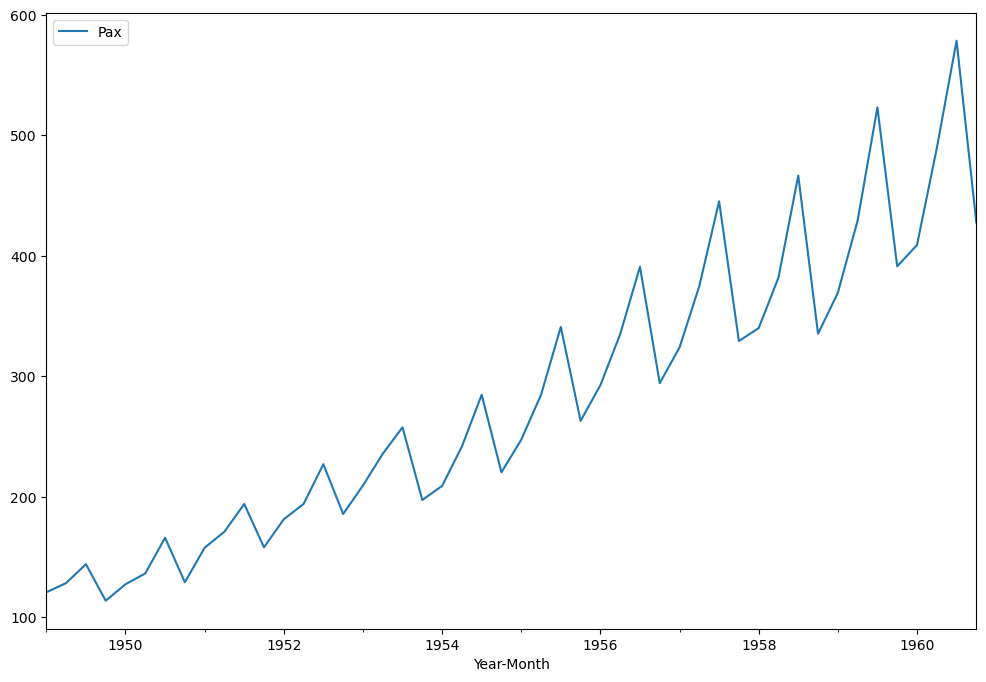

In [36]:
df_q.plot()

# Upsampling 
- getting into details

In [40]:
# Changing monthly series to daily
df_d = df.resample('D').ffill()
df_d 

# All days of a month have same values

,Pax
Year-Month,
1949-01-01,112
1949-01-02,112
1949-01-03,112
1949-01-04,112
1949-01-05,112
...,...
1960-11-27,390
1960-11-28,390
1960-11-29,390


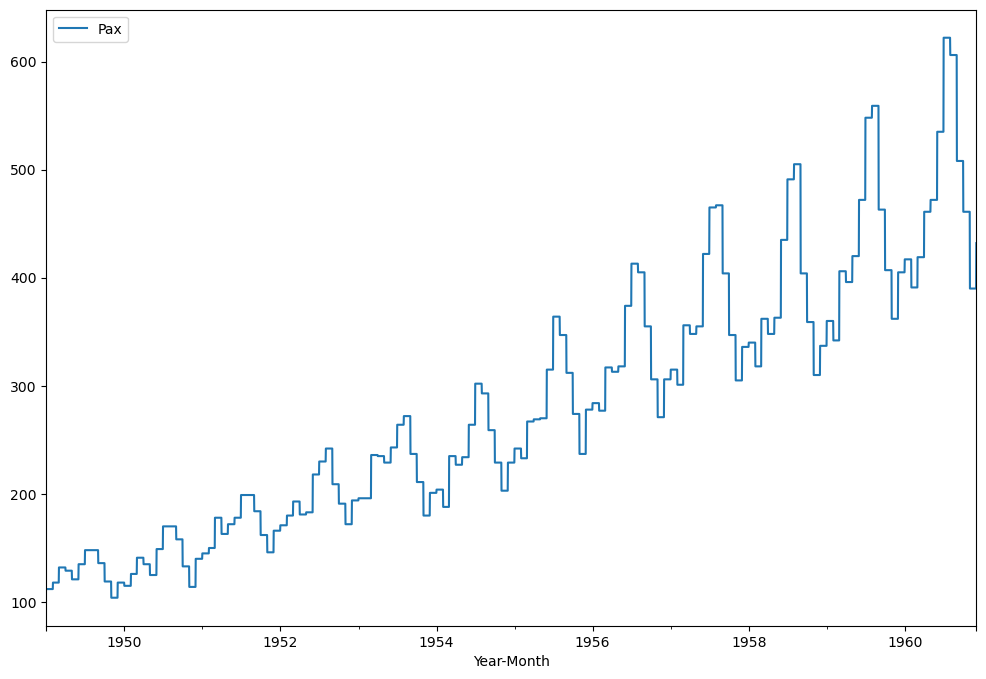

In [41]:
df_d.plot()
plt.show()

In [42]:
# Changing monthly series to hourly

df_h = df.resample('H').interpolate()
df_h
# interpolate gives linear variables -- i.e. Pax value is not constant as in ffill()

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


In [43]:
# 144 rows data converted into 104449

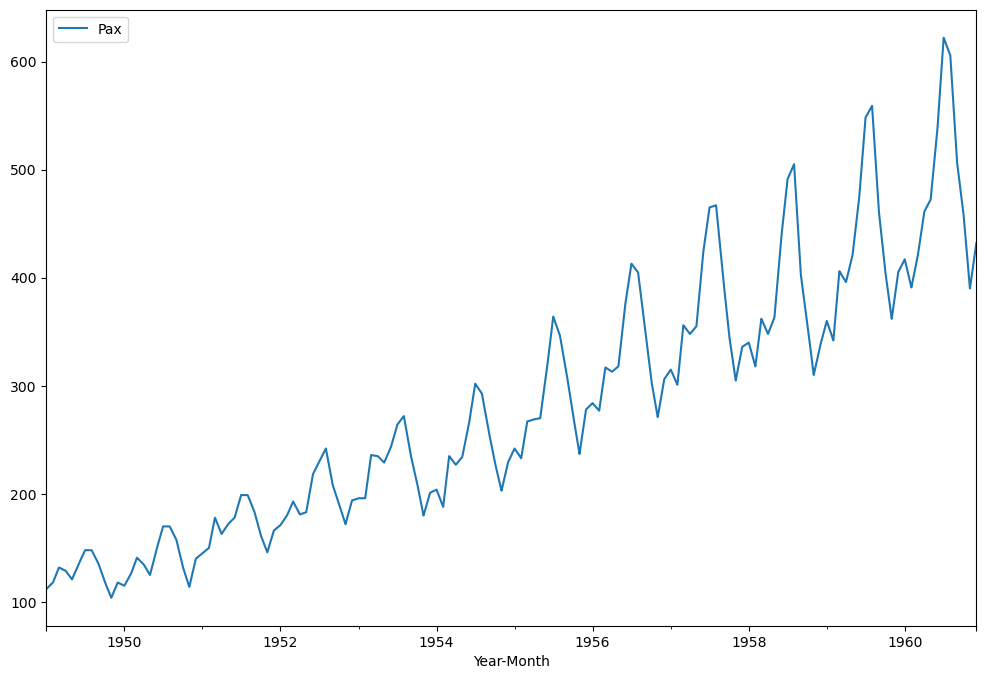

In [44]:
df_h.plot()
plt.show()